In [1]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [3]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(perch_length,perch_weight,random_state=42)

test_array = np.array([1,2,3,4])
print(test_array.shape)

 #reshape로 2,2 행 2 열 2의 튜플로 변환 가능
test_array = test_array.reshape(2,2)
print(test_array.shape) #reshape로 2,2 행 2 열 2의 튜플로 변환 가능

train_input = train_input.reshape(-1,1) #-1은 전체 원소를 표현하는것
test_input = test_input.reshape(-1,1) #이렇게 변환하는 이유는 사이킷런에서 사용할 훈련세트는 2차원 배열이 되어야하므로
print(train_input.shape,test_input.shape)

(4,)
(2, 2)
(42, 1) (14, 1)


In [6]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(train_input,train_target)

print(lr.predict([[50]]))
print(lr.coef_,lr.intercept_)
#기울기, y절편

[1241.83860323]
[39.01714496] -709.0186449535477


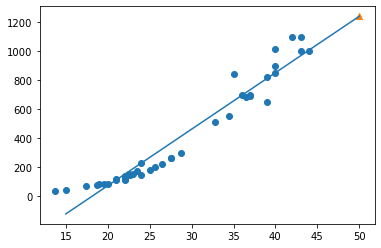

In [9]:
import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)

# 15~50까지의 1차 방정식 그래프를 그린다.
plt.plot([15,50],[15 * lr.coef_ + lr.intercept_,50 * lr.coef_ +lr.intercept_])
plt.scatter(50,1241.8,marker='^')
plt.show()

In [10]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))
#전체적으로 과소적합이다. 모두 점수가 낮은편. -> 1차 직선방정식이 아닌 2차방정식을 사용하자!

0.939846333997604
0.8247503123313558


In [11]:
#2차 방정식을 위해선 train_input의 데이터에 원래 특성의 제곱값이 필요.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
#브로드 캐스팅으로 해당 train,test_input의 모든 원소의 제곱을 시행

print(train_poly.shape)
print(test_poly.shape)

(42, 2)
(14, 2)


In [14]:
lr = LinearRegression()
lr.fit(train_poly,train_target)
print(lr.predict([[50**2, 50]]))
print(lr.coef_,lr.intercept_)

[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278304


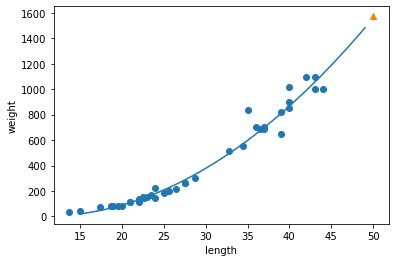

In [17]:
point = np.arange(15,50)

plt.scatter(train_input,train_target)
plt.plot(point, 1.01* point ** 2 - 21.6 * point + 116.05)

plt.scatter(50,1574,marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [19]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325122
